# Data Exploration

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from pandas.plotting import autocorrelation_plot
from sklearn import preprocessing

# All Year

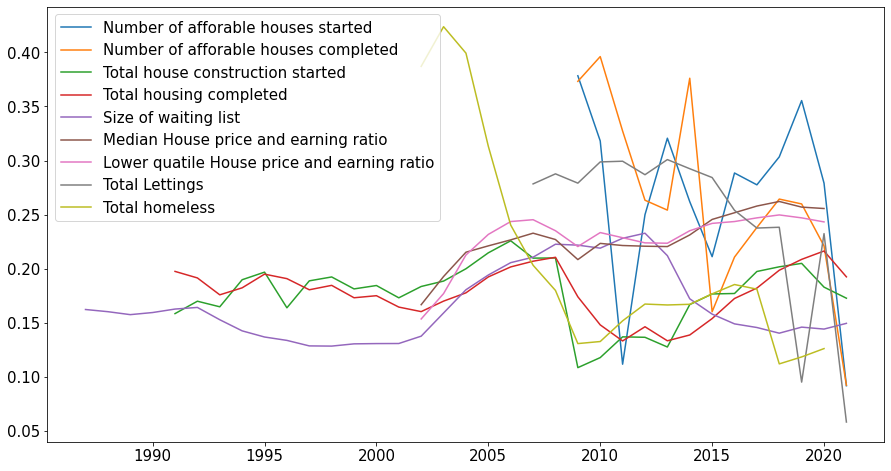

In [6]:
allTS = pd.read_excel (r"Data/all_in_one_Time_sieries_data_color.xlsx", sheet_name=0)

aff_started = allTS.iloc[22:, 1]
allTS['Number_of_afforable_houses_started'] = allTS['Number_of_afforable_houses_started'].fillna(0)
aff_startedN = preprocessing.normalize([aff_started])[0]

aff_complete = allTS.iloc[22:, 2]
allTS['Number_of_afforable_houses_completed'] = allTS['Number_of_afforable_houses_completed'].fillna(0)
aff_completeN = preprocessing.normalize([aff_complete])[0]

tot_started = allTS.iloc[4:, 3]
allTS['Total_house_construction_started'] = allTS['Total_house_construction_started'].fillna(0)
tot_startedN = preprocessing.normalize([tot_started])[0]

tot_complete = allTS.iloc[4:, 4]
allTS['Total_housing_completed'] = allTS['Total_housing_completed'].fillna(0)
tot_completeN = preprocessing.normalize([tot_complete])[0]
                                                      
waiting2 = allTS.iloc[0:, 5]
allTS['Size_of_waiting_list'] = allTS['Size_of_waiting_list'].fillna(0)
waiting2N = preprocessing.normalize([waiting2])[0]

earnings2 = allTS.iloc[15:34, 6]
allTS['Median_House_price_and_earning_ratio'] = allTS['Median_House_price_and_earning_ratio'].fillna(0)
earnings2N = preprocessing.normalize([earnings2])[0]

LQ = allTS.iloc[15:34, 7]
allTS['Lower_quatile_House_price_and_earning_ratio'] = allTS['Lower_quatile_House_price_and_earning_ratio'].fillna(0)
LQN = preprocessing.normalize([LQ])[0]

lettings = allTS.iloc[20:, 8]
allTS['Total_Lettings'] = allTS['Total_Lettings'].fillna(0)
lettingsN = preprocessing.normalize([lettings])[0]

homeless2 = allTS.iloc[15:34, 9]
allTS['homeless'] = allTS['homeless'].fillna(0)
homeless2N = preprocessing.normalize([homeless2])[0]

plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(15,8))
plt.plot(allTS.iloc[22:, 0],aff_startedN, label = "Number of afforable houses started")
plt.plot(allTS.iloc[22:, 0], aff_completeN, label = "Number of afforable houses completed")
plt.plot(allTS.iloc[4:, 0], tot_startedN, label = "Total house construction started")
plt.plot(allTS.iloc[4:, 0], tot_completeN, label = "Total housing completed")
plt.plot(allTS.iloc[0:, 0], waiting2N, label = "Size of waiting list")
plt.plot(allTS.iloc[15:34, 0], earnings2N, label = "Median House price and earning ratio")
plt.plot(allTS.iloc[15:34, 0], LQN, label = "Lower quatile House price and earning ratio")
plt.plot(allTS.iloc[20:, 0], lettingsN, label = "Total Lettings")
plt.plot(allTS.iloc[15:34, 0], homeless2N, label = "Total homeless")
plt.legend()

plt.savefig('Figure/Linda_year_all.png', dpi=300)

# Yearly Data

In [3]:
waiting = pd.read_excel (r"Data/waiting_LQ_data.xlsx", sheet_name=0, skiprows = 1)
price = pd.read_excel (r"Data/waiting_LQ_data.xlsx", sheet_name=1, skiprows = 1)
earnings = pd.read_excel (r"Data/waiting_LQ_data.xlsx", sheet_name=2, skiprows = 1)
ratio = pd.read_excel (r"Data/waiting_LQ_data.xlsx", sheet_name=3, skiprows = 1)
homeless = pd.read_excel (r"Data/waiting_LQ_data.xlsx", sheet_name=5, skiprows = 1)

homeless = homeless.drop(homeless.iloc[:,2:6], axis=1)
waiting = waiting.drop(waiting.iloc[:,2:17], axis=1)

priceCol = price.iloc[0][2:]
waitingCol = waiting.iloc[0][2:]
ratioCol = ratio.iloc[0][2:]
homelessCol = homeless.iloc[0][2:]

merged = pd.read_excel (r"Data/waiting_LQ_data.xlsx", sheet_name=6)
merged = merged.drop(merged.iloc[:, 0:1], axis=1)

merged_all = pd.read_excel (r"Data/waiting_LQ_data.xlsx", sheet_name=4)
merged_all = merged_all.drop(merged.iloc[:, :0], axis=1)

In [13]:
merged_all

,Unnamed: 0,waiting,price,homeless,ratio,earning,householdPop,affordable completed,social Lettings
0,2002.0,1093342.0,67000.0,123840.0,4.41,14755.0,20553236.0,NaN,NaN
1,2003.0,1263931.0,80000.0,135580.0,5.17,15293.0,20650943.0,NaN,NaN
2,2004.0,1434874.0,100000.0,127750.0,6.16,15909.0,20751955.0,NaN,NaN
3,2005.0,1543337.0,112500.0,100170.0,6.70,16427.0,20925683.0,NaN,NaN
4,2006.0,1634301.0,119995.0,76860.0,7.15,16645.0,21071616.0,NaN,NaN
5,2007.0,1674421.0,125000.0,64970.0,7.26,17227.0,21223341.0,NaN,366820.000000
6,2008.0,1769939.0,125000.0,57510.0,6.96,17968.0,21399891.0,NaN,379082.000000
7,2009.0,1763140.0,120000.0,41780.0,6.41,18395.0,21561859.0,40550.0,367755.000000
8,2010.0,1740997.0,127500.0,42390.0,6.76,18495.0,21742577.0,43040.0,393625.000000
9,2011.0,1813559.0,125000.0,48510.0,6.64,18528.0,21976219.0,35558.0,389805.000000


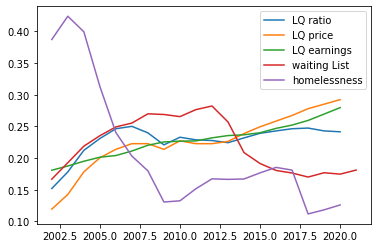

In [14]:
plt.plot(list(ratio.columns)[2:], preprocessing.normalize([ratioCol])[0], label = "LQ ratio")
plt.plot(list(price.columns)[2:], preprocessing.normalize([priceCol])[0], label = "LQ price")
plt.plot(list(earnings.columns)[2:], preprocessing.normalize([earningsCol])[0], label = "LQ earnings")
plt.plot(list(waiting.columns)[2:], preprocessing.normalize([waitingCol])[0], label = "waiting List")
plt.plot(list(homeless.columns)[2:], preprocessing.normalize([homelessCol])[0], label = "homelessness")

plt.legend()

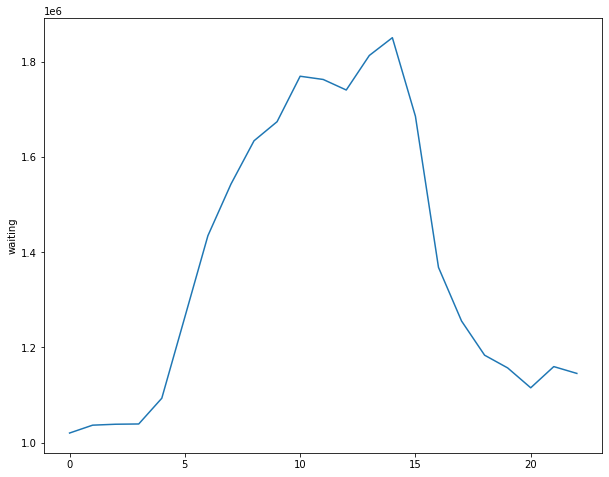

In [15]:
plt.figure(figsize=(10,8))
# sns.lineplot(data=merged['waiting'], palette="deep");
sns.lineplot(data=merged['waiting'], palette="deep");

35


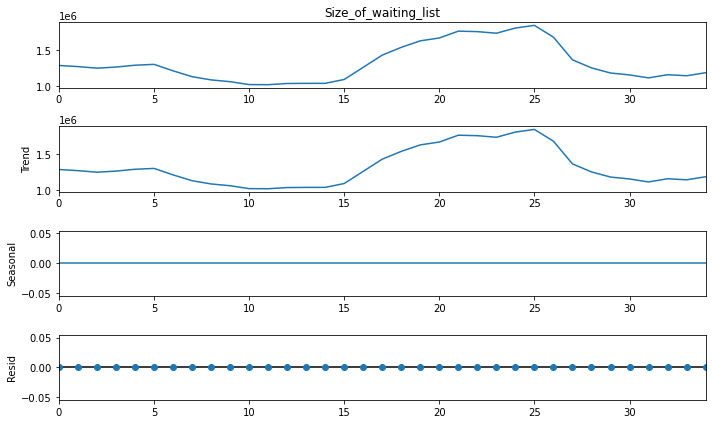

In [23]:
# time series decomposition
import statsmodels.api as sm

print(len(waiting2N))
decomposition = sm.tsa.seasonal_decompose(waiting2, model='additive', period = 1)
fig = decomposition.plot()

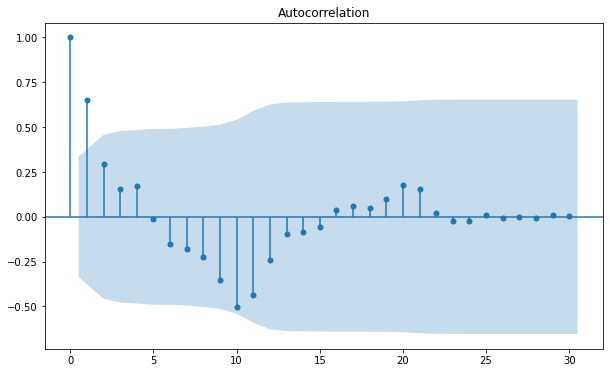

In [17]:
# remove trend form waiting list
data2 = allTS['Size_of_waiting_list'] - allTS['Size_of_waiting_list'].shift(1)
plt.rc("figure", figsize=(10,6))
sm.graphics.tsa.plot_acf(data2[1:], lags=30);

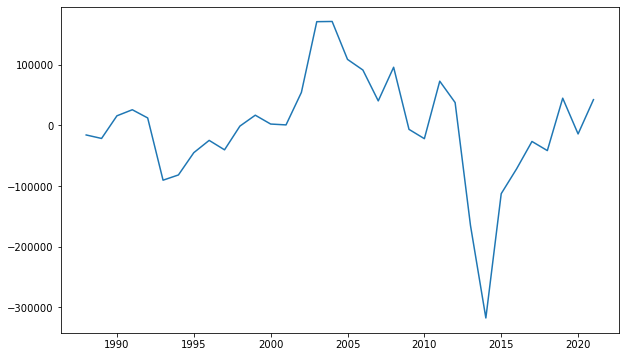

In [388]:
# sns.lineplot(data=data2[1:], palette="deep");
plt.plot(allTS.iloc[0:, 0], data2, label = "Total homeless")

19


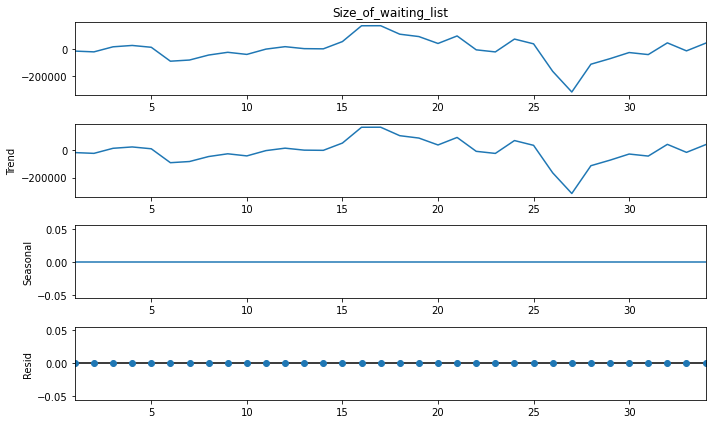

In [24]:
# time series decomposition
import statsmodels.api as sm

print(len(homelessCol))
decomposition = sm.tsa.seasonal_decompose(data2[1:], model='additive', period = 1)
fig = decomposition.plot()

In [164]:
def corr_matrix(df):
    #correlation_matrix = df.drop(['volume'], axis=1)
    correlation_matrix = df.drop(['Unnamed: 0'], axis =1).corr()
    print(correlation_matrix)
    
    fig, ax = plt.subplots(figsize=(13,10))

    sns.heatmap(correlation_matrix,
                annot=True,
                fmt='.2f',
                #cmap='YlGnBu',
                ax=ax);
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14);

                       waiting     price  homeless     ratio   earning  \
waiting               1.000000 -0.175807 -0.178673  0.168141 -0.295701   
price                -0.175807  1.000000 -0.848613  0.858326  0.948181   
homeless             -0.178673 -0.848613  1.000000 -0.735535 -0.827688   
ratio                 0.168141  0.858326 -0.735535  1.000000  0.657733   
earning              -0.295701  0.948181 -0.827688  0.657733  1.000000   
householdPop         -0.245926  0.884433 -0.753632  0.594627  0.977240   
affordable completed  0.577590 -0.554161 -0.336282 -0.551686 -0.539156   
social Lettings       0.914087 -0.943850  0.186954 -0.585551 -0.906577   

                      householdPop  affordable completed  social Lettings  
waiting                  -0.245926              0.577590         0.914087  
price                     0.884433             -0.554161        -0.943850  
homeless                 -0.753632             -0.336282         0.186954  
ratio                     0.5

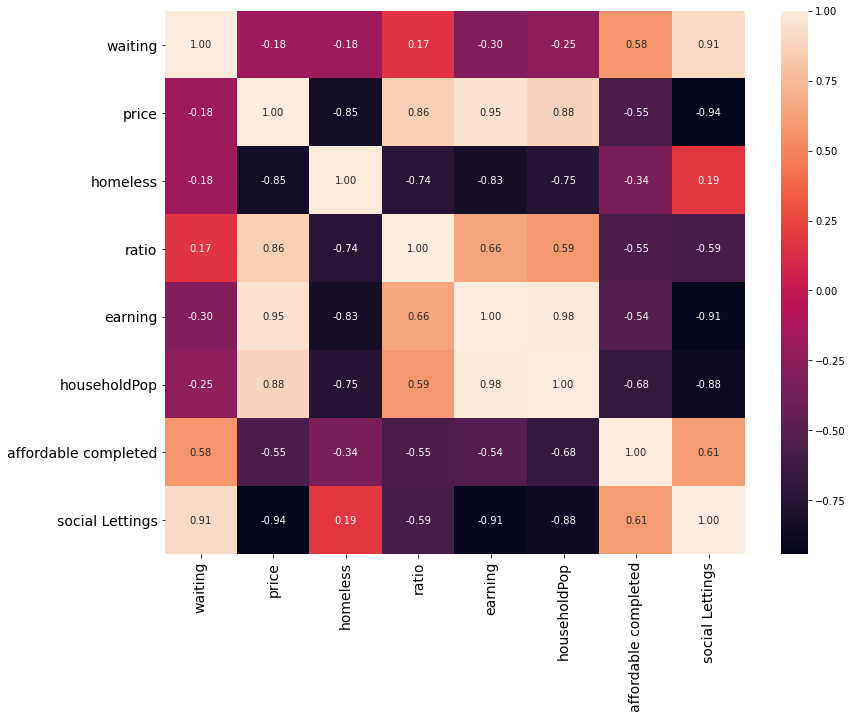

In [165]:
corr_matrix(merged_all)

<ipython-input-179-2ef371305efa>:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  merged_all.hist(ax = ax)


array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'waiting'}>,
        <AxesSubplot:title={'center':'price'}>],
       [<AxesSubplot:title={'center':'homeless'}>,
        <AxesSubplot:title={'center':'ratio'}>,
        <AxesSubplot:title={'center':'earning'}>],
       [<AxesSubplot:title={'center':'householdPop'}>,
        <AxesSubplot:title={'center':'affordable completed'}>,
        <AxesSubplot:title={'center':'social Lettings'}>]], dtype=object)

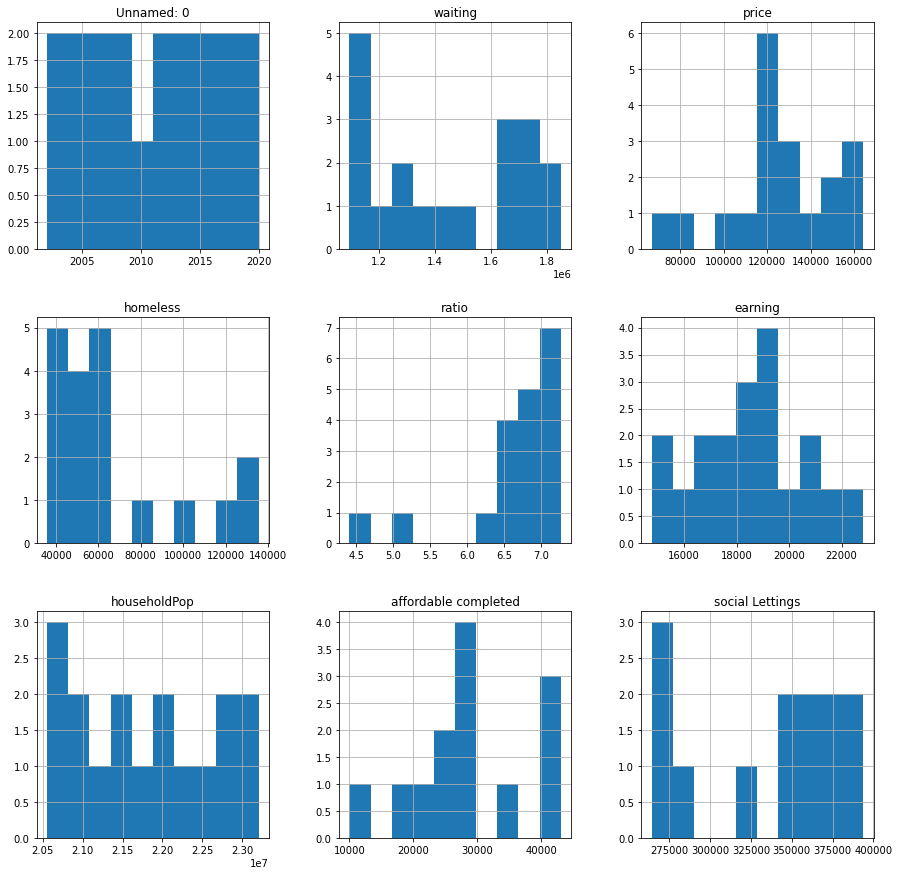

In [179]:
# review summary statistics

fig = plt.figure(figsize = (15,15))
ax = fig.gca()
merged_all.hist(ax = ax)
    
# merged_all.hist()
# plt.figure(figsize=(20,30))
# plt.show();

# Quarterly Data

In [8]:
# quarterly data on homelessness and the waiting list
df = pd.read_excel (r"Data/all_in_one_Time_sieries_data_color.xlsx", sheet_name=4)
TA = df.iloc[0:, 3]

In [11]:
localization = df.iloc[0:, 2]
df.iloc[0:, 2] = ['1998 - Q1','Q2','Q3','Q4',
    '1999 - Q1','99-Q2','99-Q3','99-Q4',
    '2000 - Q1','00-Q2','00-Q3','00-Q4',
    '2001 - Q1','01-Q2','01-Q3','01-Q4',
    '2002 - Q1','02-Q2','02-Q3','02-Q4',
    '2003 - Q1','03-Q2','03-Q3','03-Q4',
    '2004 - Q1','04-Q2','04-Q3','04-Q4',
    '2005 - Q1','05-Q2','05-Q3','05-Q4',
    '2006 - Q1','06-Q2','06-Q3','06-Q4',
    '2007 - Q1','07-Q2','07-Q3','07-Q4',
    '2008 - Q1','08-Q2','08-Q3','08-Q4',
    '2009 - Q1','09-Q2','09-Q3','09-Q4',
    '2010 - Q1','10-Q2','10-Q3','10-Q4',
    '2011 - Q1','11-Q2','11-Q3','11-Q4',
    '2012 - Q1','12-Q2','12-Q3','12-Q4',
    '2013 - Q1','13-Q2','13-Q3','13-Q4',
    '2014 - Q1','14-Q2','14-Q3','14-Q4',
    '2015 - Q1','15-Q2','15-Q3','15-Q4',
    '2016 - Q1','16-Q2','16-Q3','16-Q4',
    '2017 - Q1','17-Q2','17-Q3','17-Q4',
    '2018 - Q1','18-Q2','18-Q3','18-Q4',
    '2019 - Q1','19-Q2','19-Q3','19-Q4',
    '2020 - Q1','20-Q2','20-Q3','20-Q4',
    '2021 - Q1','21-Q2','21-Q3']


D:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


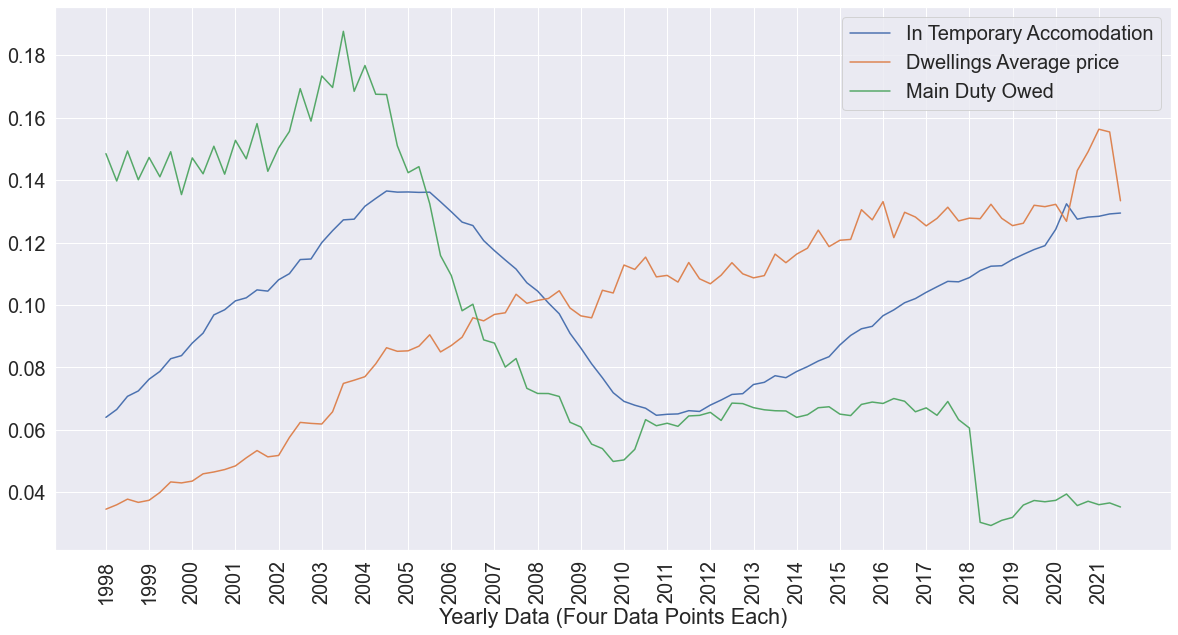

In [25]:

# TA_norm = [float(i)/sum(TA) for i in TA]
TA_norm = preprocessing.normalize([TA])[0]

dwellings = df.iloc[0:, 4]
# dwellings_norm = [float(i)/sum(dwellings) for i in dwellings]
dwellings_norm = preprocessing.normalize([dwellings])[0]

main = df.iloc[0:, 5]
# main_norm =  [float(i)/sum(main) for i in main]
main_norm = preprocessing.normalize([main])[0]

plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
ax = sns.set(font_scale = 1.8)
ax = sns.set_theme()

ax = sns.lineplot(df.iloc[0:, 2], TA_norm, label = "In Temporary Accomodation",markers=True, dashes=False)
ax = sns.lineplot(df.iloc[0:, 2], dwellings_norm, label = "Dwellings Average price",markers=True, dashes=False)
ax = sns.lineplot(df.iloc[0:, 2], main_norm, label = "Main Duty Owed",markers=True, dashes=False)



ax.set(xlabel='Yearly Data (Four Data Points Each)')
plt.xticks(list(range(0,96,4)), list(range(1998,2022)))
plt.legend(loc=1, prop={'size': 20})

plt.savefig('Figure/quarter_all.png',dpi = 300,bbox_inches='tight')


In [181]:
def corr_matrix(df):
    #correlation_matrix = df.drop(['volume'], axis=1)
    correlation_matrix = df.drop(['year'], axis =1).corr()
    print(correlation_matrix)
    
    fig, ax = plt.subplots(figsize=(13,10))

    sns.heatmap(correlation_matrix,
                annot=True,
                fmt='.2f',
                #cmap='YlGnBu',
                ax=ax);
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14);

                 TA  dwellings      main
TA         1.000000   0.119312  0.193177
dwellings  0.119312   1.000000 -0.872733
main       0.193177  -0.872733  1.000000


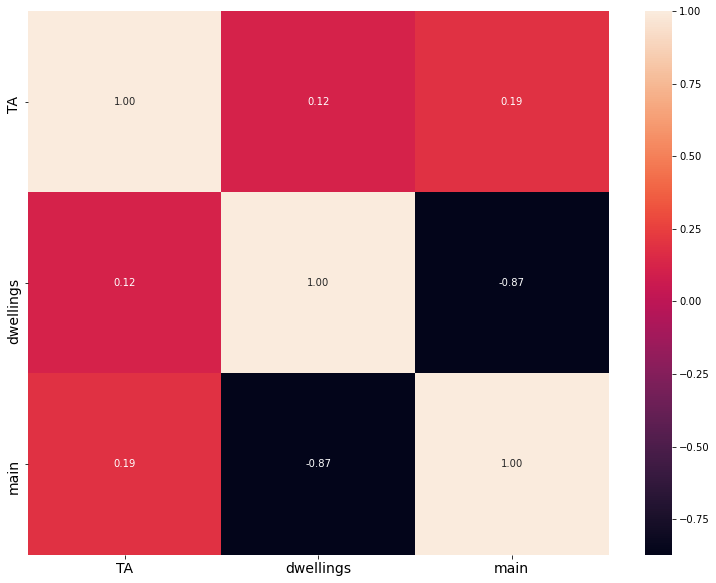

In [182]:
corr_matrix(df)

<ipython-input-180-108d2497bf9b>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df.hist(ax = ax)


array([[<AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'TA'}>],
       [<AxesSubplot:title={'center':'dwellings'}>,
        <AxesSubplot:title={'center':'main'}>]], dtype=object)

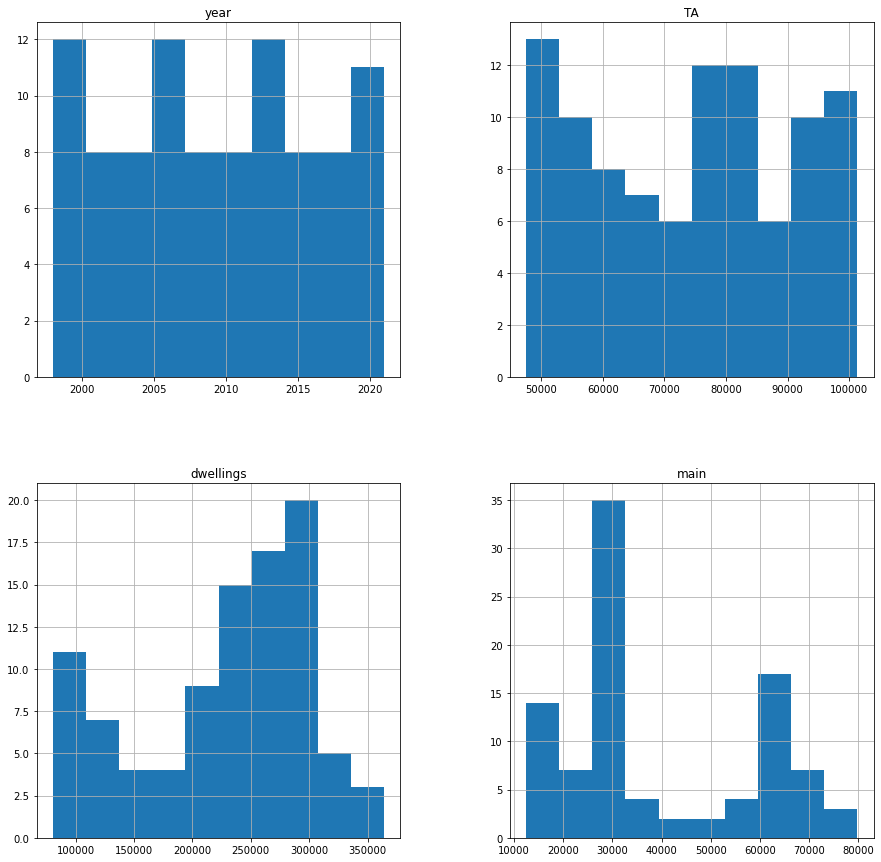

In [180]:
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
df.hist(ax = ax)

C:\Users\linda\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='title', ylabel='First time buyers'>

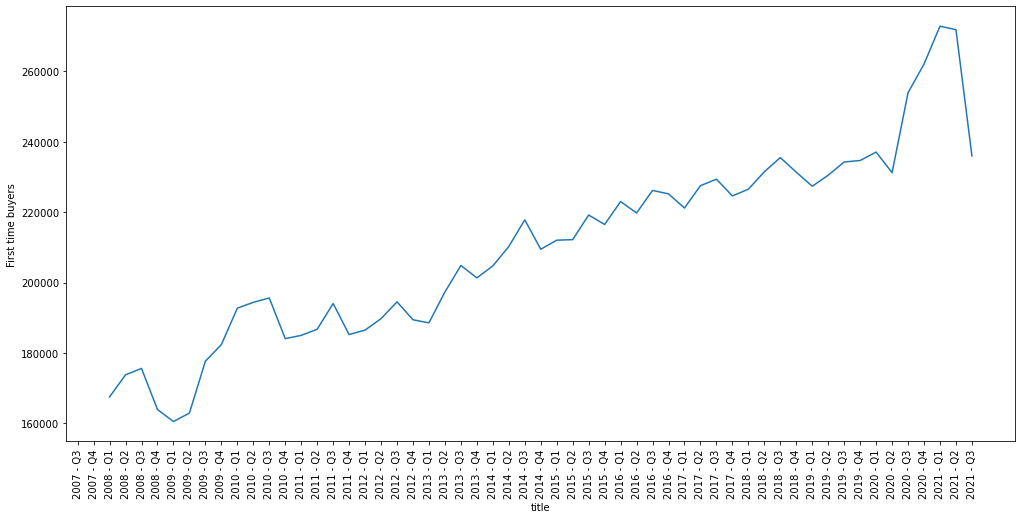

In [64]:
# before removing trend
plt.figure(figsize=(17,8))
plt.xticks(rotation=90)
sns.lineplot(df.iloc[0:, 2],data[1:])
# plt.plot(df.iloc[0:, 2], main_norm, label = "Main Duty Owed")

## Time series decomposition

95


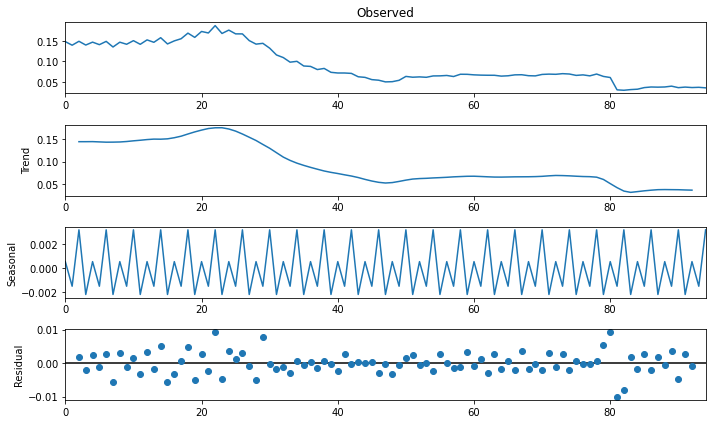

In [34]:
# time series decomposition
import statsmodels.api as sm

print(len(main))
decomposition = sm.tsa.seasonal_decompose(main_norm, model='additive', period = 4)
fig = decomposition.plot()

## Autocorrelation

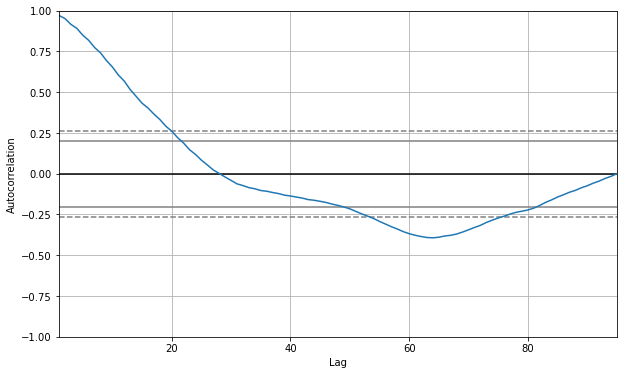

In [72]:
# autocorralation
df = pd.read_excel (r"Data/all_in_one_Time_sieries_data_color.xlsx", sheet_name=4)
plt.rc("figure", figsize=(10,6))
pd.plotting.autocorrelation_plot(df['main']);

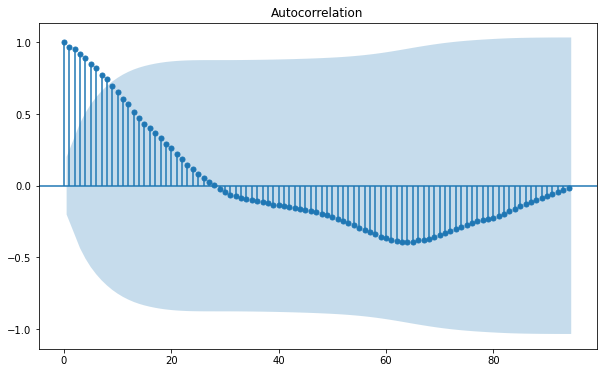

In [14]:
import statsmodels.api as sm
plt.rc("figure", figsize=(10,6))
sm.graphics.tsa.plot_acf(df['main'], lags = 94);

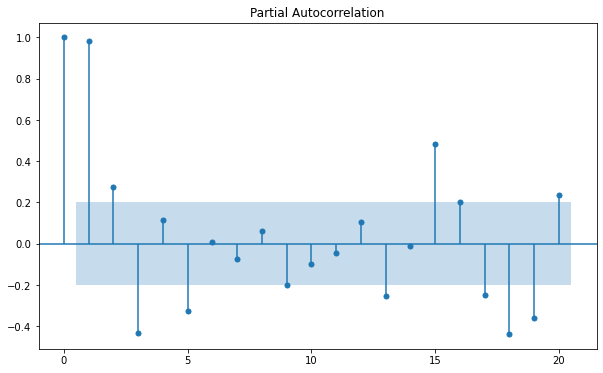

In [49]:
# partial autocorrelation
plt.rc("figure", figsize=(10,6))
sm.graphics.tsa.plot_pacf(df['main']);

## Removing Trend

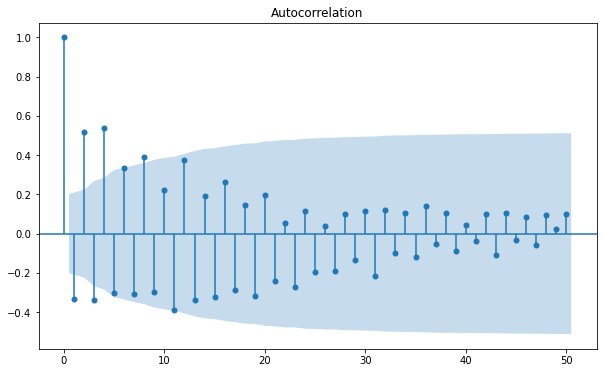

In [30]:
# removing trend by differencing to make time-sereis data stationary
data = df['main'] - df['main'].shift(1)
plt.rc("figure", figsize=(10,6))
sm.graphics.tsa.plot_acf(data[1:], lags=50);


data.to_excel("Data/TS_trend.xlsx")

In [217]:
# data1 = df['dwellings'] - df['dwellings'].shift(1)
# plt.rc("figure", figsize=(10,6))
# sm.graphics.tsa.plot_acf(data1[1:], lags=50);

# df_trend = pd.read_excel (r"Data/TS_trend.xlsx", sheet_name=0)
# df_trend.insert(loc=1,
#           column='dwellings',
#           value=data1)
# display(df_trend)

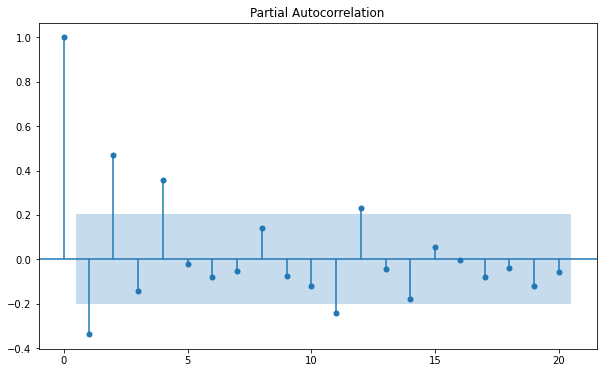

In [221]:
plt.rc("figure", figsize=(10,6))
sm.graphics.tsa.plot_pacf(data[1:]);

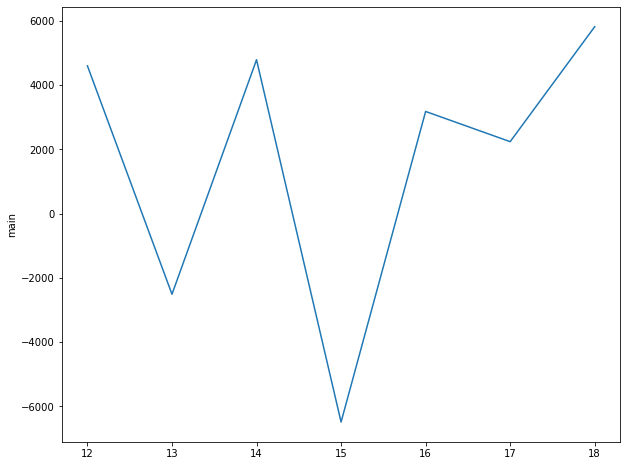

In [158]:
plt.figure(figsize=(10,8))
sns.lineplot(data=data[1:], palette="deep");

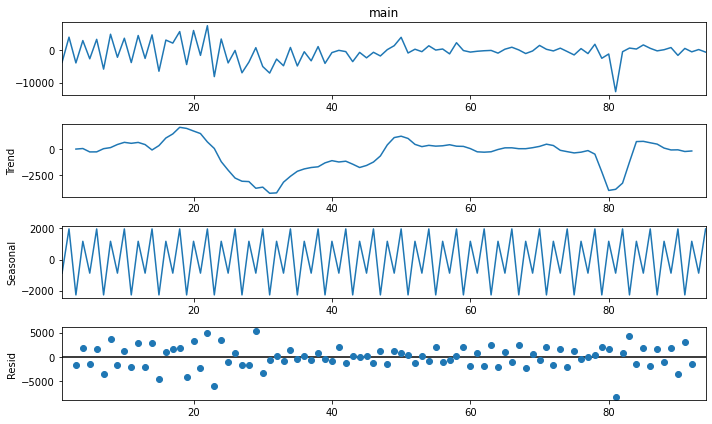

In [35]:
# time series decomposition
import statsmodels.api as sm

decomposition = sm.tsa.seasonal_decompose(data[1:], model='additive', period = 4)
fig = decomposition.plot()

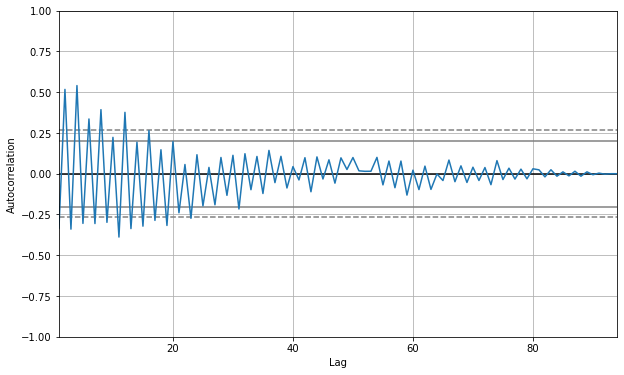

In [78]:
pd.plotting.autocorrelation_plot(data[1:]);

## Stationarity

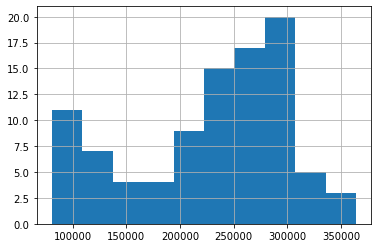

In [285]:
# review summary statistics
df_focus = df['dwellings']
# df_focus = merged_all['price']
df_focus.hist()
plt.show();

In [204]:
X = df_focus.values
split = round(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=53817.291667, mean2=23792.765957
variance1=273529365.581597, variance2=36125777.455862


In [205]:
# The Augmented Dickey-Fuller test is a type of statistical test called a unit root test. 
# The intuition behind a unit root test is that it determines how strongly a time series is defined by a trend.

from statsmodels.tsa.stattools import adfuller

X = df_focus.values

result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.240789
p-value: 0.655808
Critical Values:
	1%: -3.505
	5%: -2.894
	10%: -2.584


In [206]:
# try with the removed trend data

X = data[1:].values

result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))
    
#p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

ADF Statistic: -2.891976
p-value: 0.046289
Critical Values:
	1%: -3.505
	5%: -2.894
	10%: -2.584


In [71]:
X = data1[1:].values
split = round(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=-890.851064, mean2=-131.702128
variance1=15434777.999095, variance2=4701682.209144
